In [14]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [11]:
train = pd.read_csv('/work/work/input/train.csv')
test = pd.read_csv('/work/work/input/test.csv')
train

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6


# データの整理

In [26]:
# datetime列をdatetime型に変換
train['datetime'] = pd.to_datetime(train['datetime'])


## 販売量の推移

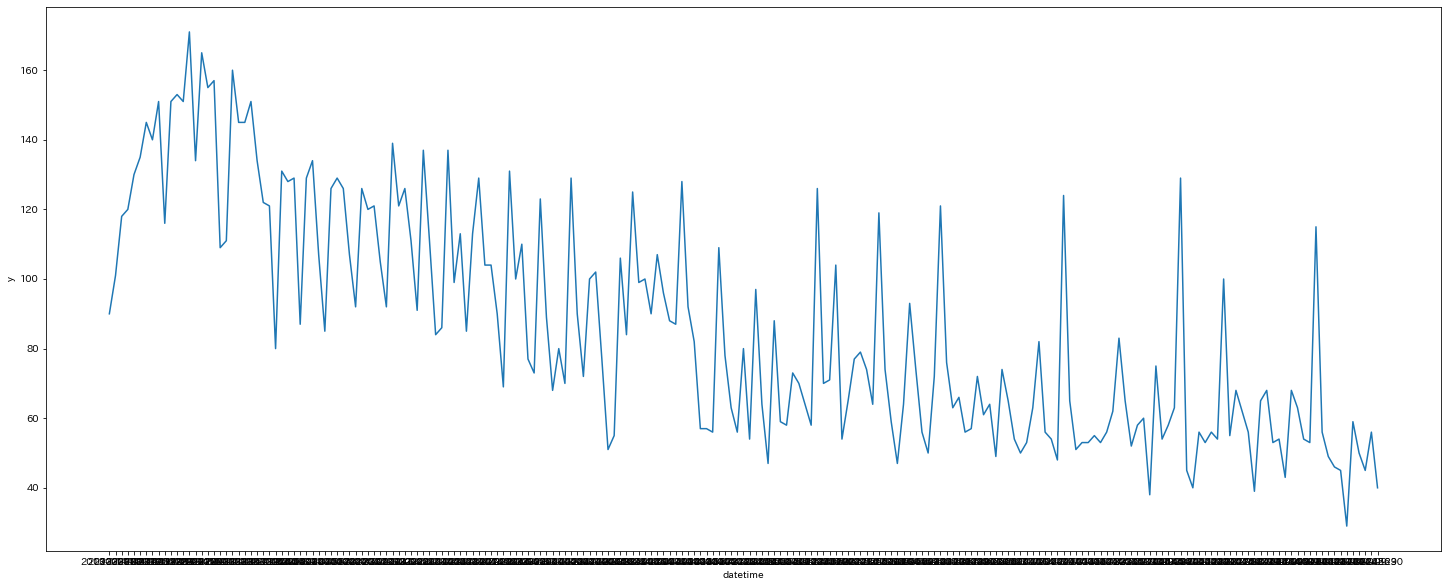

In [21]:
plt.figure(figsize = (25,10))
sns.lineplot(x = 'datetime', y = 'y', data = train)
sns.set()
plt.show()

１１月からスタートして９月までのデータ。  
平均的に販売量は現象傾向にある。　

### 月別平均と標準誤差


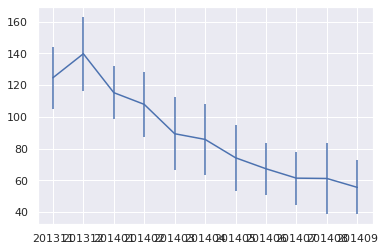

<Figure size 1800x720 with 0 Axes>

In [46]:
# 年月列を追加
train['ym'] = train['datetime'].dt.strftime('%Y%m')

# 年月でgroupbyして平均と標準誤差を算出
year_month_mean = train.groupby(['ym'], as_index = False).mean()[['ym','y']]
year_month_std = train.groupby(['ym'], as_index = False).std()[['ym','y']]

fig, ax = plt.subplots(1,1)
ax.errorbar(x = 'ym', y = 'y', yerr = year_month_std['y'], data = year_month_mean)
plt.show()

やっぱり減っていってるのは明らか。　なぜだろう。